In [9]:
import pandas as pd
import numpy as np
from fbprophet import  Prophet

In [10]:
data=pd.read_csv('399300.csv',encoding='GB2312')
data.head()

AttributeError: 'PandasArray' object has no attribute '_str_len'

,time,股票代码,名称,price,最高价,最低价,开盘价,前收盘,涨跌额,涨跌幅,成交量,成交金额
0,2021/1/22,'399300,沪深300,5569.7760,5573.6594,5513.8769,5562.3790,5564.9693,4.8067,0.0864,19930002000,4.570000e+11
1,2021/1/21,'399300,沪深300,5564.9693,5593.1058,5490.5626,5492.9587,5476.4336,88.5357,1.6167,20995019700,4.530000e+11
2,2021/1/20,'399300,沪深300,5476.4336,5496.0493,5426.5357,5439.9111,5437.5234,38.9102,0.7156,17091326000,3.740000e+11
3,2021/1/19,'399300,沪深300,5437.5234,5532.4793,5415.7166,5525.9690,5518.5205,-80.9971,-1.4677,21104342500,4.330000e+11
4,2021/1/18,'399300,沪深300,5518.5205,5541.4613,5410.7750,5438.1618,5458.0812,60.4393,1.1073,20705186900,4.230000e+11


In [23]:
df = data[[u'time',u'price']]

In [24]:
df.columns = ['ds','y']
df['y'] = df['y'].apply(lambda x:np.log(int(x)))

C:\Users\Owen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [26]:
future = m.make_future_dataframe(periods=10)
forecast = m.predict(future)

In [27]:
future_predict = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)
future_predict['yhat'] = future_predict['yhat'].apply(lambda x:np.exp(x))
future_predict['yhat_lower'] = future_predict['yhat_lower'].apply(lambda x:np.exp(x))
future_predict['yhat_upper'] = future_predict['yhat_upper'].apply(lambda x:np.exp(x))



In [28]:
future_predict

AttributeError: 'PandasArray' object has no attribute '_str_len'

,ds,yhat,yhat_lower,yhat_upper
4620,2021-01-18,4415.026258,4001.684539,4915.572249
4621,2021-01-19,4413.068763,4010.117448,4866.502096
4622,2021-01-20,4411.593457,4004.592753,4855.367911
4623,2021-01-21,4403.937417,4006.971312,4898.205421
4624,2021-01-22,4403.095303,3994.615876,4832.162973
4625,2021-01-23,4452.538461,4043.435803,4883.344002
4626,2021-01-24,4449.771454,4033.534818,4913.155917
4627,2021-01-25,4397.315329,4009.663632,4861.098379
4628,2021-01-26,4394.906217,3983.194078,4886.511617
4629,2021-01-27,4393.463622,3967.387909,4830.910380


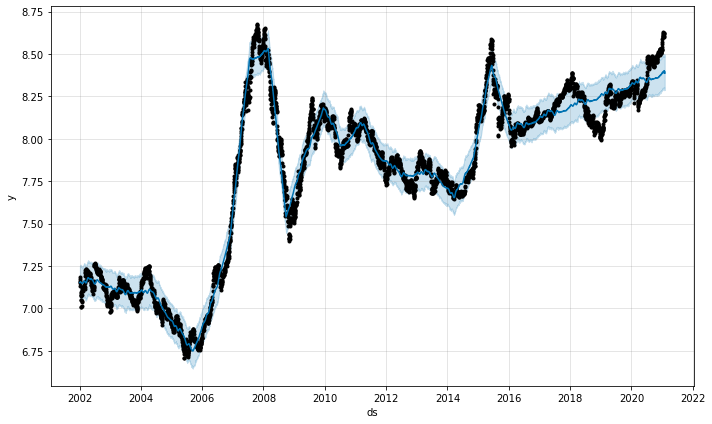

In [29]:
fig1 = m.plot(forecast)  #成分拆分，国内股市的趋势以及季节性因素

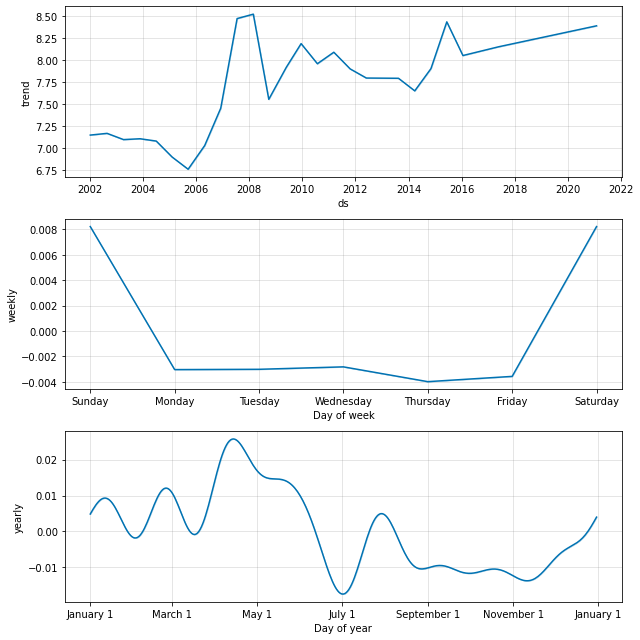

In [30]:
fig2 = m.plot_components(forecast) #时间序列的分量